Data can be downloaded at https://inclass.kaggle.com/c/new-cs570-midterm-challenge

In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

%pylab inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline


from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading csv file
df=pd.read_csv("midterm_train.csv")

In [3]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [4]:
df.shape

(160000, 51)

16000 Rows and 51 Columns

In [5]:
#data frame to X
X=pd.DataFrame()
X=df

cleaning data and removing symbols

In [6]:
X["x32"] = X["x32"].str.replace('%','')

In [7]:
X["x37"] = X["x37"].str.replace('$','')

Value counts

In [8]:
X.x32.value_counts()

0.01     40767
-0.01    34094
0.0      33923
-0.0     30492
-0.02     9924
0.02      7987
-0.03     1727
0.03       855
-0.04      138
0.04        55
-0.05        6
0.05         1
Name: x32, dtype: int64

In [9]:
X.x37.value_counts()

-311.26     6
341.26      6
-415.46     6
618.22      6
72.42       6
237.4       6
-336.77     6
134.29      5
-990.22     5
-78.24      5
-369.13     5
3.39        5
757.41      5
-464.21     5
-586.03     5
-206.08     5
482.41      5
-1018.16    5
-106.65     5
259.01      5
458.98      5
-525.72     5
-378.49     5
-771.89     5
-371.18     5
-699.58     5
-134.05     5
1154.12     5
511.78      5
-151.45     5
           ..
-1788.72    1
-1.4        1
1781.14     1
1066.31     1
1781.13     1
-1560.1     1
360.69      1
360.68      1
-1333.55    1
2047.51     1
2047.52     1
515.67      1
515.66      1
-949.57     1
-949.55     1
-949.51     1
1957.03     1
1920.41     1
-629.96     1
2258.31     1
1457.98     1
-185.22     1
1457.93     1
1457.92     1
-439.14     1
1066.39     1
1066.38     1
-89.47      1
1781.11     1
1104.57     1
Name: x37, dtype: int64

In [10]:
#taking columns to s
s=X.columns
s

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x24', u'x25', u'x26', u'x27',
       u'x28', u'x29', u'x30', u'x31', u'x32', u'x33', u'x34', u'x35', u'x36',
       u'x37', u'x38', u'x39', u'x40', u'x41', u'x42', u'x43', u'x44', u'x45',
       u'x46', u'x47', u'x48', u'x49', u'y'],
      dtype='object')

In [11]:
Y=pd.DataFrame()
Y['y']=X['y']

In [12]:
#popping Y
X.pop('y')
X.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x24', u'x25', u'x26', u'x27',
       u'x28', u'x29', u'x30', u'x31', u'x32', u'x33', u'x34', u'x35', u'x36',
       u'x37', u'x38', u'x39', u'x40', u'x41', u'x42', u'x43', u'x44', u'x45',
       u'x46', u'x47', u'x48', u'x49'],
      dtype='object')

In [13]:
X.x29

0          July
1           Aug
2          July
3          July
4          July
5           Aug
6           Jun
7           Aug
8           May
9           Jun
10         July
11         July
12          Aug
13          May
14          Jun
15        sept.
16        sept.
17          Jun
18          Jun
19          May
20          May
21          Aug
22         July
23         July
24          Jun
25         July
26          Aug
27        sept.
28          Jun
29          Jun
          ...  
159970      Apr
159971      Jun
159972      Aug
159973     July
159974      Aug
159975      Jun
159976      Jun
159977      Jun
159978     July
159979      Jun
159980     July
159981      Aug
159982     July
159983      May
159984      Jun
159985      Jun
159986      May
159987      Aug
159988      Aug
159989      May
159990      Mar
159991     July
159992      Jun
159993      Jun
159994      Jun
159995      Aug
159996      May
159997      Jun
159998      May
159999      Aug
Name: x29, dtype: object

In [14]:
X.x30.value_counts()

wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64

In [15]:
X.x28.value_counts()

-20.200874    1
 2.644036     1
-5.454864     1
 18.775454    1
-7.394649     1
-16.961690    1
 7.827609     1
 2.975488     1
 13.403553    1
 29.632166    1
-1.746341     1
-2.413494     1
 0.314731     1
 2.412733     1
 9.659860     1
 2.149620     1
 4.206231     1
 3.602460     1
-8.114516     1
-6.535888     1
-7.104641     1
-10.166924    1
 7.178681     1
-9.632055     1
 26.238750    1
 9.717752     1
-5.523440     1
-6.248815     1
-7.405831     1
-23.163480    1
             ..
 7.947481     1
 20.945915    1
-15.758015    1
 5.238081     1
 17.774032    1
-21.709893    1
-2.422578     1
 16.994987    1
-12.008187    1
 17.480804    1
 2.783244     1
 18.099731    1
 14.086126    1
 5.172687     1
-12.318781    1
-12.019978    1
-2.823414     1
-20.537644    1
 27.516825    1
-0.855667     1
-4.690893     1
 27.881302    1
 5.996422     1
-35.728028    1
 12.166832    1
-13.856094    1
 0.879934     1
 10.898167    1
 1.685559     1
-15.821178    1
Name: x28, dtype: int64

In [16]:
#checking for numerical variables
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742


In [17]:
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    
describe_categorical(X)

,x24,x29,x30,x32,x37
count,159972,159970,159970,159969,159977
unique,3,12,5,12,129198
top,asia,July,wednesday,0.01,-311.26
freq,138965,45569,101535,40767,6


In [18]:
#X[X.x24.isnull()]
X.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32     object
x33    float64
x34    float64
x35    float64
x36    float64
x37     object
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
dtype: object

In [19]:
index = np.argwhere(s=='x24')
s = np.delete(s, index)
index = np.argwhere(s=='x30')
s = np.delete(s, index)
index = np.argwhere(s=='x29')
s = np.delete(s, index)
index = np.argwhere(s=='y')
s = np.delete(s, index)
s

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x32', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39',
       u'x40', u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48',
       u'x49'],
      dtype='object')

In [20]:
s

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x32', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39',
       u'x40', u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48',
       u'x49'],
      dtype='object')

In [21]:
#data type conversion
X.x32=X.x32.astype(np.float64)
X.x37=X.x37.astype(np.float64)

In [22]:
#Replacing Missing values in each column with mean
for i in s:
    X[i] = X[i].fillna(X[i].mean())


In [23]:
X.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32    float64
x33    float64
x34    float64
x35    float64
x36    float64
x37    float64
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
dtype: object

In [24]:
#Categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    
describe_categorical(X)

,x24,x29,x30
count,159972,159970,159970
unique,3,12,5
top,asia,July,wednesday
freq,138965,45569,101535


In [25]:
#Creating Dummies for categorical variables
categorical_variables = ['x24','x29','x30']

for variable in categorical_variables:
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [26]:
X.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x32', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39',
       u'x40', u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48',
       u'x49', u'x24_america', u'x24_asia', u'x24_euorpe', u'x29_Apr',
       u'x29_Aug', u'x29_Dev', u'x29_Feb', u'x29_January', u'x29_July',
       u'x29_Jun', u'x29_Mar', u'x29_May', u'x29_Nov', u'x29_Oct',
       u'x29_sept.', u'x30_friday', u'x30_monday', u'x30_thurday',
       u'x30_tuesday', u'x30_wednesday'],
      dtype='object')

In [27]:
X.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_sept.,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,...,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,0.007694,0.137119,0.002106,0.015044,0.067619,0.003525,0.003050,0.183931,0.174712,0.634594
std,0.371107,6.340137,13.271904,8.064099,6.381775,7.669189,19.297096,30.539687,8.900601,6.354444,...,0.087376,0.343974,0.045846,0.121727,0.251091,0.059267,0.055143,0.387429,0.379722,0.481545
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.251574,-4.260377,-10.163721,-5.452183,-4.312029,-5.147177,-14.777287,-27.318385,-6.030219,-4.259907,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.001980,0.004056,-1.336542,-0.028386,-0.000105,0.013582,-1.943830,-6.961396,-0.018784,0.005462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.248505,4.282958,7.868661,5.443760,4.305730,5.188709,11.444045,12.213263,5.971778,4.305071,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#using random forest regression
model = RandomForestClassifier(200, oob_score=True, n_jobs=-1, random_state=42)

model.fit(X,Y)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [29]:
#oob score
model.oob_score_


0.92380625000000005

In [30]:
#Reading test dataset
dfTest=pd.read_csv("midterm_test.csv")

In [31]:
dfTest.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x24', u'x25', u'x26', u'x27',
       u'x28', u'x29', u'x30', u'x31', u'x32', u'x33', u'x34', u'x35', u'x36',
       u'x37', u'x38', u'x39', u'x40', u'x41', u'x42', u'x43', u'x44', u'x45',
       u'x46', u'x47', u'x48', u'x49'],
      dtype='object')

In [32]:
test=dfTest.columns

In [33]:
dfTest.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32     object
x33    float64
x34    float64
x35    float64
x36    float64
x37     object
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
dtype: object

In [34]:
#removing symbols
dfTest["x32"] = dfTest["x32"].str.replace('%','')
dfTest["x37"] = dfTest["x37"].str.replace('$','')

In [35]:
#converting to float
dfTest.x32=dfTest.x32.astype(np.float64)
dfTest.x37=dfTest.x37.astype(np.float64)

In [36]:
#Replacing null values with just like i did in train dataset
for i in s:
    dfTest[i] = dfTest[i].fillna(dfTest[i].mean())

In [37]:
#looking for categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    
describe_categorical(dfTest)

,x24,x29,x30
count,39987,39993,39994
unique,3,12,5
top,asia,July,wednesday
freq,34665,11500,25153


In [38]:
#creating dummies
categorical_variables = ['x24','x29','x30']

for variable in categorical_variables:
    # Create array of dummies
    dummies = pd.get_dummies(dfTest[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    dfTest = pd.concat([dfTest, dummies], axis=1)
    dfTest.drop([variable], axis=1, inplace=True)

In [39]:
dfTest.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x32', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39',
       u'x40', u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48',
       u'x49', u'x24_america', u'x24_asia', u'x24_euorpe', u'x29_Apr',
       u'x29_Aug', u'x29_Dev', u'x29_Feb', u'x29_January', u'x29_July',
       u'x29_Jun', u'x29_Mar', u'x29_May', u'x29_Nov', u'x29_Oct',
       u'x29_sept.', u'x30_friday', u'x30_monday', u'x30_thurday',
       u'x30_tuesday', u'x30_wednesday'],
      dtype='object')

In [40]:
dfTest.shape

(40000, 67)

In [41]:
X.shape

(160000, 67)

In [42]:
X.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x32', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39',
       u'x40', u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48',
       u'x49', u'x24_america', u'x24_asia', u'x24_euorpe', u'x29_Apr',
       u'x29_Aug', u'x29_Dev', u'x29_Feb', u'x29_January', u'x29_July',
       u'x29_Jun', u'x29_Mar', u'x29_May', u'x29_Nov', u'x29_Oct',
       u'x29_sept.', u'x30_friday', u'x30_monday', u'x30_thurday',
       u'x30_tuesday', u'x30_wednesday'],
      dtype='object')

In [43]:
dfTest.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x32', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39',
       u'x40', u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48',
       u'x49', u'x24_america', u'x24_asia', u'x24_euorpe', u'x29_Apr',
       u'x29_Aug', u'x29_Dev', u'x29_Feb', u'x29_January', u'x29_July',
       u'x29_Jun', u'x29_Mar', u'x29_May', u'x29_Nov', u'x29_Oct',
       u'x29_sept.', u'x30_friday', u'x30_monday', u'x30_thurday',
       u'x30_tuesday', u'x30_wednesday'],
      dtype='object')

In [44]:
Testpred=model.predict(dfTest)

In [45]:
Testpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
#Result before grid search
Testp=pd.DataFrame()
Testp['y']=Testpred
Testp.to_csv("sub1_new.csv")

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


30 trees
C-stat:  0.89939375

50 trees
C-stat:  0.91096875

100

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 trees
C-stat:  0.9200625

200 trees
C-stat:  0.9245625

500

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 trees
C-stat:  0.9271125

1000 trees
C-stat:  0.92784375

2000 trees
C-stat:  0.92838125



C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


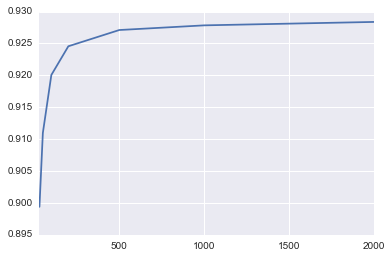

In [47]:
#grid search
#Checking trees
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=47)
    model.fit(X, Y)
    print trees, "trees"
    roc = model.oob_score_
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


auto option
C-stat:  0.92784375

None option
C-stat:  0.92814375

sqrt

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 option
C-stat:  0.92784375

log2 option
C-stat:  0.9224625

0.9

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 option
C-stat:  0.93148125

0.2 option
C-stat:  0.9328625



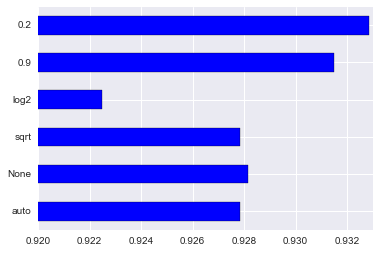

In [48]:
#checking features
results2 = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=47, max_features=max_features)
    model.fit(X, Y)
    print max_features, "option"
    roc = model.oob_score_
    print "C-stat: ", roc
    results2.append(roc)
    print ""
    
pd.Series(results2, max_features_options).plot(kind="barh", xlim=(.920,.933));

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 min samples
C-stat:  0.92784375

2 min samples
C-stat:  0.92670625

3

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 min samples
C-stat:  0.92529375

4 min samples
C-stat:  0.9249

5

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 min samples
C-stat:  0.9237625

6 min samples
C-stat:  0.922225

7

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 min samples
C-stat:  0.92133125

8 min samples
C-stat:  0.92055

9

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 min samples
C-stat:  0.920175

10 min samples
C-stat:  0.91884375



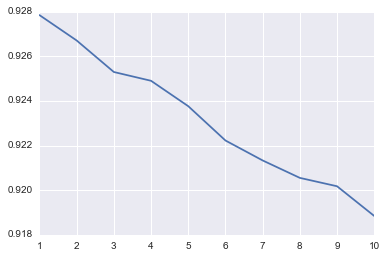

In [49]:
#checking leafs
results3 = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=47, max_features="auto",  min_samples_leaf=min_samples)
    model.fit(X, Y)
    print min_samples, "min samples"
    roc = model.oob_score_
    print "C-stat: ", roc
    results3.append(roc)
    print ""
    
pd.Series(results3, min_samples_leaf_options).plot();

In [50]:
#Got best results at 2000 trees and fatures 0.2
model = RandomForestClassifier(n_estimators=2000, oob_score=True, n_jobs=-1, random_state=42, max_features= 0.2,  min_samples_leaf=1)
model.fit(X, Y)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.2, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [51]:
Testpred1=model.predict(dfTest)

In [52]:
Testpred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
#Printing final output to CSV
Testp1=pd.DataFrame()
Testp1['y']=Testpred1
Testp1.to_csv("sub2_new.csv")